In [85]:
import numpy as np

In [86]:
import pandas as pd

In [87]:
import scipy as sp

In [88]:
import math as mt

In [89]:
import seaborn as sns

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [91]:
df = pd.read_csv("arrhythmia.csv" , header = None)

In [92]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [93]:
pd.isnull(df).sum().sum()

0

In [94]:
df = df.replace('?' , np.NaN)

In [95]:
pd.isnull(df).sum().sum()

408

Text(0, 0.5, 'Number of null in each column')

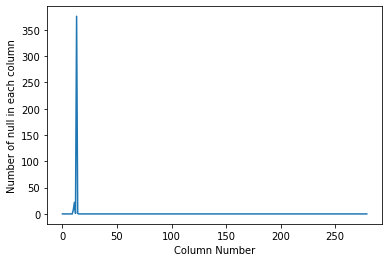

In [96]:
pd.isnull(df).sum().plot()
plt.xlabel('Column Number')
plt.ylabel('Number of null in each column')

Text(0, 0.5, 'Total number of null value in each column')

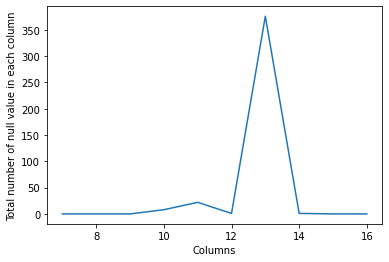

In [97]:
pd.isnull(df).sum()[7:17].plot(kind="line")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

In [98]:
df.drop(columns = 13 , inplace = True)

In [99]:
new_df = df.copy()

In [100]:
cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [101]:
mean_imputer = SimpleImputer()

In [102]:
new_df = pd.DataFrame(mean_imputer.fit_transform(new_df))

In [103]:
new_df.columns = df.columns

In [104]:
df = new_df
pd.isnull(df).sum().sum()

0

In [105]:
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [106]:
df.columns = final_df_columns
new_df.to_csv("new data with target class.csv")

df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [107]:
t = df.sort_values(by = ["class"])

In [108]:
t

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
451,78.0,1.0,160.0,70.0,79.0,127.0,364.0,138.0,78.0,28.0,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1.0
171,50.0,0.0,168.0,80.0,95.0,159.0,358.0,166.0,96.0,-50.0,...,0.0,8.1,-6.5,0.0,0.0,0.6,0.8,-5.9,0.1,1.0
172,32.0,1.0,163.0,65.0,100.0,145.0,377.0,152.0,101.0,28.0,...,0.0,12.0,-5.5,0.0,0.0,0.6,3.3,12.1,40.4,1.0
176,64.0,1.0,160.0,67.0,78.0,162.0,351.0,152.0,97.0,72.0,...,0.0,10.3,0.0,0.0,0.0,0.5,1.5,30.9,39.6,1.0
177,27.0,1.0,155.0,55.0,77.0,205.0,345.0,144.0,149.0,66.0,...,-0.4,8.9,-0.9,0.0,0.0,-0.3,1.9,14.3,27.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,43.0,0.0,172.0,90.0,71.0,182.0,356.0,131.0,105.0,14.0,...,0.0,8.4,-1.0,0.0,0.0,0.8,1.2,22.1,35.5,16.0
54,52.0,0.0,165.0,80.0,88.0,202.0,369.0,113.0,97.0,58.0,...,-0.5,10.7,-1.7,0.0,0.0,0.4,-0.3,19.6,17.7,16.0
53,24.0,1.0,163.0,53.0,92.0,157.0,370.0,142.0,68.0,64.0,...,-1.6,16.5,0.0,0.0,0.0,0.4,2.1,44.0,61.6,16.0
340,54.0,0.0,170.0,70.0,96.0,154.0,328.0,170.0,114.0,85.0,...,0.0,13.1,-2.4,0.0,0.0,0.6,1.2,25.7,36.2,16.0


In [109]:
la = t["class"].value_counts(sort = False).tolist()

<Axes: xlabel='class', ylabel='count'>

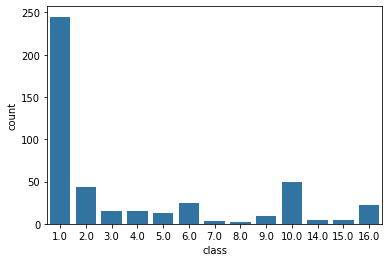

In [110]:
sns.countplot(x = 'class' , data = df)

In [111]:
class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [112]:
df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


# Handling Outliers

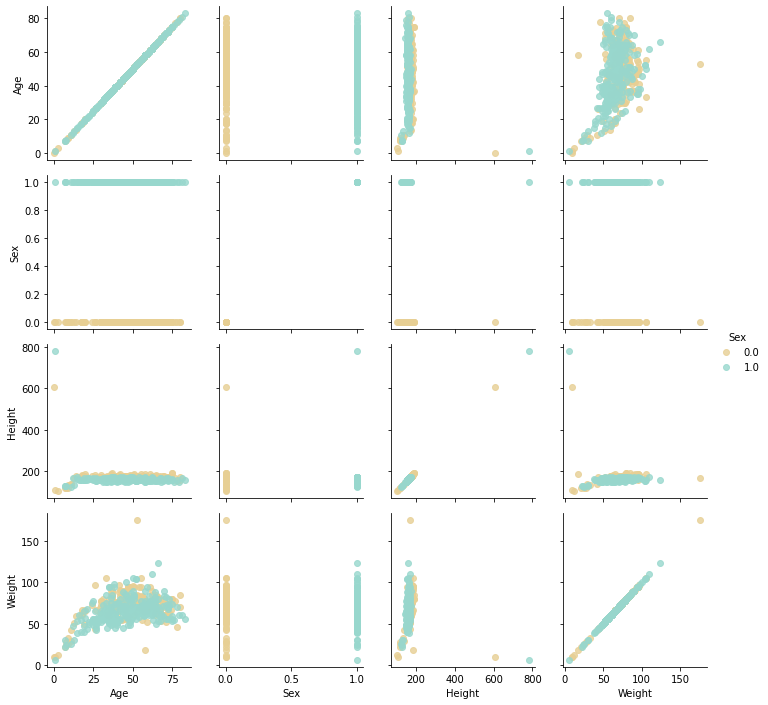

In [113]:
g = sns.PairGrid(df, vars = ['Age' , 'Sex' , 'Height' , 'Weight'], hue = 'Sex' , palette = 'BrBG')
g.map(plt.scatter , alpha = 0.8)
g.add_legend();

In [114]:
sorted(df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [115]:
df['Height']=df['Height'].replace(608,190)
df['Height']=df['Height'].replace(780,190)

In [116]:
sorted(df['Height'], reverse=True)[:10]

[190.0, 190.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [117]:
sorted(df['Weight'] , reverse = True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

<Axes: >

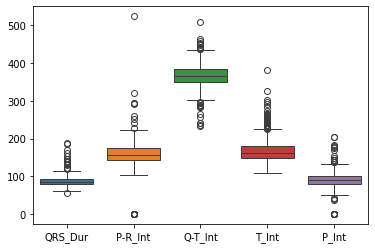

In [119]:
sns.boxplot(data = df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]])

In [120]:
df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


Text(0, 0.5, 'Counts')

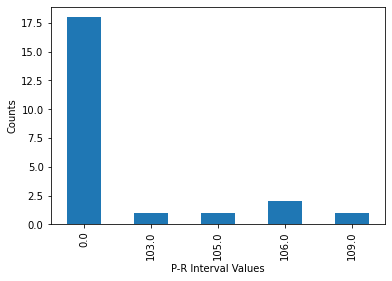

In [126]:
df['P-R_Int'].value_counts().sort_index().head().plot(kind = 'bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Counts')

<Axes: >

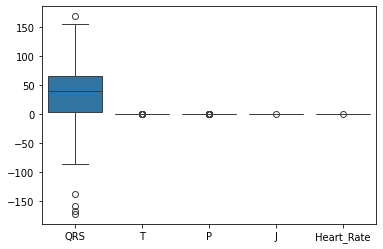

In [127]:
sns.boxplot(data = df[["QRS" , "T" , "P" , "J" , "Heart_Rate"]])


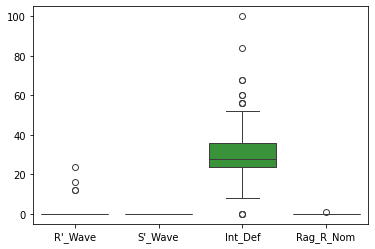

In [137]:
sns.boxplot(data = df[["R'_Wave" , "S'_Wave" , "Int_Def" , "Rag_R_Nom"]]);

# Feature Scaling and Splitting the dataset

In [138]:
df.shape

(452, 279)

In [142]:
X = df.iloc[: , 0:278]
y = df.iloc[: , 278:279]

In [143]:
y.head()

,class
0,8.0
1,6.0
2,10.0
3,1.0
4,7.0


In [144]:
X.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [145]:
from sklearn.model_selection import train_test_split

In [149]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

In [151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 278)
(91, 278)
(361, 1)
(91, 1)


# KNN Classifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knc = KNeighborsClassifier()

In [155]:
knc.fit(X_train , y_train)

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [157]:
y_pred = knc.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [159]:
acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred , average = 'weighted')
rec = recall_score(y_test , y_pred , average = 'weighted')
f1 = f1_score(y_test , y_pred , average = 'weighted')

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [160]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.6923076923076923
The precision score is :- 0.6288798920377867
The recall score is :- 0.6923076923076923
The f1 score is :- 0.6118197278911565


# Logistic regression

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr = LogisticRegression()

In [164]:
lr.fit(X_train , y_train)

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
y_pred = lr.predict(X_test)

In [166]:
acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred , average = 'weighted')
rec = recall_score(y_test , y_pred , average = 'weighted')
f1 = f1_score(y_test , y_pred , average = 'weighted')

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [167]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.6923076923076923
The precision score is :- 0.6897042866430622
The recall score is :- 0.6923076923076923
The f1 score is :- 0.6869119287956129


# Decision Tree Classifier

In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
dtc = DecisionTreeClassifier()

In [170]:
dtc.fit(X_train , y_train)

DecisionTreeClassifier()

In [171]:
y_pred = dtc.predict(X_test)

In [172]:
acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred , average = 'weighted')
rec = recall_score(y_test , y_pred , average = 'weighted')
f1 = f1_score(y_test , y_pred , average = 'weighted')

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [173]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.6153846153846154
The precision score is :- 0.6501616031027796
The recall score is :- 0.6153846153846154
The f1 score is :- 0.6259866809103981


# Linear SVM

In [174]:
from sklearn.svm import LinearSVC

In [175]:
lsvm = LinearSVC()

In [177]:
lsvm.fit(X_train , y_train)

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [178]:
y_pred = lsvm.predict(X_test)

acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred , average = 'weighted')
rec = recall_score(y_test , y_pred , average = 'weighted')
f1 = f1_score(y_test , y_pred , average = 'weighted')

In [180]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.6153846153846154
The precision score is :- 0.6428417520854496
The recall score is :- 0.6153846153846154
The f1 score is :- 0.6251387693828748


# Kernelized SVM

In [181]:
from sklearn import svm

In [184]:
ka = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

In [185]:
ka.fit(X_train , y_train)

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma=0.001, kernel='sigmoid')

In [186]:
y_pred = ka.predict(X_test)

In [187]:
acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred , average = 'weighted')
rec = recall_score(y_test , y_pred , average = 'weighted')
f1 = f1_score(y_test , y_pred , average = 'weighted')

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [188]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.5714285714285714
The precision score is :- 0.32653061224489793
The recall score is :- 0.5714285714285714
The f1 score is :- 0.4155844155844156


# Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfc = RandomForestClassifier()

In [192]:
rfc.fit(X_train , y_train)

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [193]:
y_pred = rfc.predict(X_test)

In [194]:
acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred , average = 'weighted')
rec = recall_score(y_test , y_pred , average = 'weighted')
f1 = f1_score(y_test , y_pred , average = 'weighted')

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [195]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.7362637362637363
The precision score is :- 0.6239301071599208
The recall score is :- 0.7362637362637363
The f1 score is :- 0.6659994788337035
